In [2]:
#programme pour mesurer la vitesse du son 
import sounddevice as sd
import soundfile as sf

# Paramètres d'enregistrement
duration = 5  # Durée de l'enregistrement en secondes
fs = 44100  # Fréquence d'échantillonnage en Hz
channels = 2  # Nombre de canaux

# Enregistrer le son
print("Enregistrement en cours...")
recorded_audio = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
sd.wait()  # Attendre la fin de l'enregistrement


# Enregistrer les données audio dans un fichier WAV
file_name = "enregistrement.wav"
sf.write(file_name, recorded_audio, fs, subtype='PCM_16')

print(f"Fichier enregistré : {file_name}")


Enregistrement en cours...
Fichier enregistré : enregistrement.wav


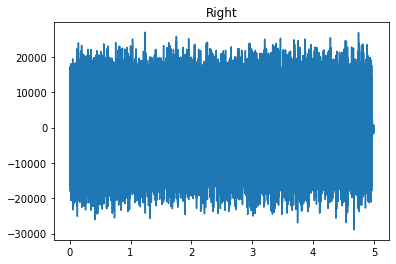

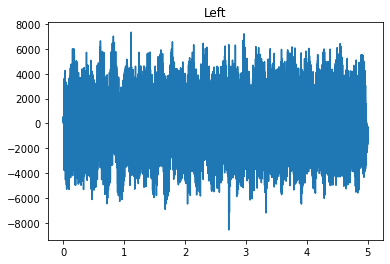

In [6]:
#permet d'afficher un son
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import numpy as np


# Charger le fichier audio
rate, data = scipy.io.wavfile.read('enregistrement.wav')


N=len(data) #nombre d'échantillions 
n = np.arange(0,N)/44100   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

data_right = data[:,1]
data_left = data[:,0]


#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)




#plt.ylim(-10000,10000)
plt.show()




In [5]:
import sounddevice as sd
import numpy as np
import threading
import soundfile as sf
import wave

class Recorder:
    def __init__(self, filename):
        self.filename = filename
        self.frames = []
        self.recording = False

    def start_recording(self, channels, samplerate):
        self.recording = True
        self.frames = []
        threading.Thread(target=self.record, args=(channels, samplerate)).start()

    def stop_recording(self):
        self.recording = False
        sd.wait()  # Attendre la fin de l'enregistrement
        file_name = "enregistrement.wav"
        sf.write(file_name, recorded_audio, fs, subtype='PCM_16')
        print(f"Fichier enregistré : {file_name}")

    def record(self, channels, samplerate):
        print("Enregistrement en cours...")
        recorded_audio = sd.rec(int(5*samplerate), samplerate=samplerate, channels=channels)
   

    def get_frames(self):
        return self.frames

def play_sound():
    duration = 5.0
    samplerate = sd.query_devices('default')['default_samplerate']
    samples = int(duration * samplerate)
    sound = np.random.randn(samples, 1)
    sd.play(sound, samplerate=samplerate)
    sd.wait()

recorder = Recorder('enregistrement.wav')
recorder.start_recording(channels=2, samplerate=44100)

play_sound()

recorder.stop_recording()
frames = recorder.get_frames()

print('Enregistrement terminé.')


Enregistrement en cours...


ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


Fichier enregistré : enregistrement.wav
Enregistrement terminé.


In [ ]:
import sounddevice as sd
import numpy as np
import threading
import time
import wave

# Fonction qui joue un bruit blanc sur un haut-parleur en utilisant un thread
def white_noise():
    while True:
        # Générer un tableau de nombres aléatoires entre -1 et 1 pour créer du bruit blanc
        data = np.random.uniform(-1, 1, 44100)
        # Jouer le bruit sur le haut-parleur
        sd.play(data, 44100)
        # Attendre un court instant avant de jouer le bruit suivant
        time.sleep(0.1)

# Lancer le thread pour jouer le bruit blanc en arrière-plan
t = threading.Thread(target=white_noise)
t.start()

# Enregistrer le son du micro dans un fichier "enregistrement.wav"
duration = 10 # Durée d'enregistrement en secondes
fs = 44100 # Fréquence d'échantillonnage
print("Enregistrement en cours...")
recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()
print("Enregistrement terminé.")

# Enregistrer les données d'enregistrement dans un fichier "enregistrement.wav"
with wave.open("enregistrement.wav", "wb") as f:
    f.setnchannels(1)
    f.setsampwidth(2)
    f.setframerate(fs)
    f.writeframes(b"".join([np.array(recording[:, 0], dtype=np.int16).tobytes()]))
